<a href="https://colab.research.google.com/github/RaulAtLehigh/CSE337_P1/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [ ]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [ ]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

# Visualize the result

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [ ]:
!pip install gymnasium[mujoco]

In [2]:
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]" --quiet
import gymnasium as gym
from stable_baselines3.common.callbacks import BaseCallback

# Create the HalfCheetah-v4 environment
env = gym.make("HalfCheetah-v4")

# Define a custom class named RewardLogger that inherits from BaseCallback
class RewardLogger(BaseCallback):
    def __init__(self, verbose: int = 0):
        super().__init__(verbose)
        # Initialize empty lists to store rewards and timesteps
        self.episode_rewards = []
        self.episode_timesteps = []

    def _on_step(self) -> bool:
        # Override the _on_step() method to log episode rewards
        if self.locals["dones"][0]:  # Check if an episode has terminated
            # Retrieve the episode reward from the episode info buffer
            # self.model.ep_info_buffer contains a deque of dictionaries
            # each dict has 'r' (reward) and 'l' (length) for an episode
            if len(self.model.ep_info_buffer) > 0:
                latest_episode_info = self.model.ep_info_buffer[-1]
                self.episode_rewards.append(latest_episode_info['r'])
                self.episode_timesteps.append(self.num_timesteps)
        return True

print("HalfCheetah-v4 environment created and RewardLogger class defined.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 154.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 156.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


HalfCheetah-v4 environment created and RewardLogger class defined.


In [3]:
from stable_baselines3 import SAC

# Instantiate the RewardLogger callback
reward_logger = RewardLogger(verbose=0)

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with 500,000 time steps and the custom callback
N = 500000
model.learn(total_timesteps=N, callback=reward_logger)

print("SAC agent training on HalfCheetah-v4 completed with RewardLogger.")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -265     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 110      |
|    time_elapsed    | 36       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -31.5    |
|    critic_loss     | 1.4      |
|    ent_coef        | 0.314    |
|    ent_coef_loss   | -11      |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -239     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 108      |
|    time_elapsed    | 73       |
|    total_timesteps | 8000     |
| train/             |

KeyboardInterrupt: 

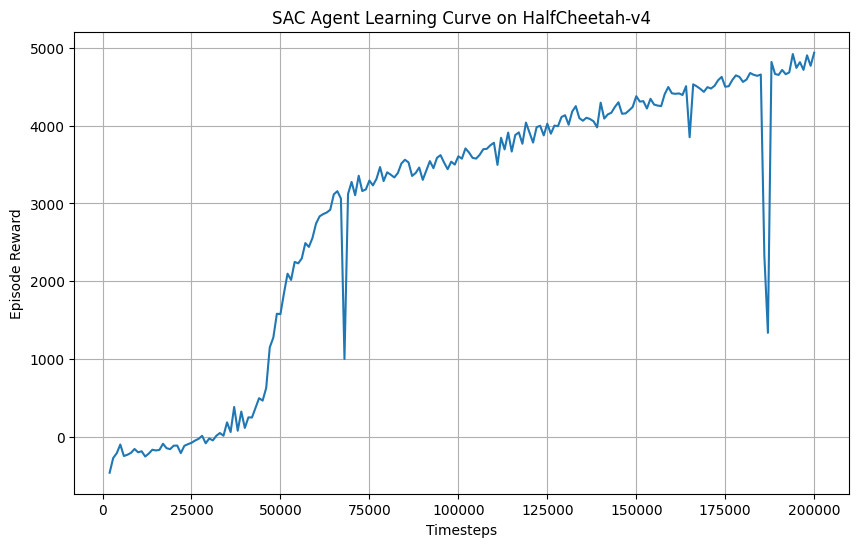

Learning curve plotted successfully.


In [5]:
import matplotlib.pyplot as plt

# Create a line plot of episode rewards against timesteps
plt.figure(figsize=(10, 6))
plt.plot(reward_logger.episode_timesteps, reward_logger.episode_rewards)

# Label the axes
plt.xlabel('Timesteps')
plt.ylabel('Episode Reward')

# Add a title to the plot
plt.title('SAC Agent Learning Curve on HalfCheetah-v4')

# Display the plot
plt.grid(True)
plt.show()

1. Did SAC reach a higher average reward or converge faster than your previous method?

The previous method I tried to use was learning through random rollouts. In my lab, I noted that it was not very good at learning however I was very impressed with SAC. SAC was able to learn really quickly and actually keep improving on the rewards it earned overtime. Most notably I'm impressed by how high of a reward it can reach, especially at not so high times steps.

2. How did changing the temperature for entropy affect the performance and stability of learning?

A high entropy temperature caused the agent to explore More, but it leads to slower convergence. When I said it really high, the motto seem to be very erratic and actually did not converge to a good outcome. I'd assume that in low entropy it can lead to faster convergence but with a trade-off of not exploring much.

3. Describe any differences you observed in exploration or motion behavior of the agent.

With SAC, this smoothness was really impressive since it seems like it was adjusting just to write them out as times steps rolled out. I think this has a lot to do with the entropy.
